# AE - Auto Encoder
### Auto Encoder is a type of neural networks for learning useful data representations unsupervisedly. Similar to PCA, AE could be used to detect outlying objects in the data by calculating the reconstruction errors.
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.auto_encoder

### Arguments that work with AE algorithm:
1. hidden_neurons
2. hidden_activation
3. output_activation
4. loss
5. optimizer
6. epochs
7. batch_size
8. dropout_rate
9. l2_regularizer
10. validation_size
11. preprocessing
12. verbose
13. random_state
14. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True)

get2D                    ...took    42.426579 seconds


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_6 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                262208    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

3/3 [==============================] - 0s 21ms/step - loss: 4.1863 - val_loss: 114.5405
Epoch 62/100
3/3 [==============================] - 0s 28ms/step - loss: 4.2861 - val_loss: 112.8934
Epoch 63/100
3/3 [==============================] - 0s 20ms/step - loss: 4.1940 - val_loss: 113.6024
Epoch 64/100
3/3 [==============================] - 0s 29ms/step - loss: 4.1407 - val_loss: 114.9458
Epoch 65/100
3/3 [==============================] - 0s 21ms/step - loss: 4.0607 - val_loss: 118.4342
Epoch 66/100
3/3 [==============================] - 0s 27ms/step - loss: 4.1859 - val_loss: 123.3368
Epoch 67/100
3/3 [==============================] - 0s 26ms/step - loss: 4.1111 - val_loss: 124.1338
Epoch 68/100
3/3 [==============================] - 0s 19ms/step - loss: 4.0595 - val_loss: 124.6320
Epoch 69/100
3/3 [==============================] - 0s 24ms/step - loss: 4.0742 - val_loss: 122.7799
Epoch 70/100
3/3 [==============================] - 0s 30ms/step - loss: 4.0066 - val_loss: 121.7829
Epo

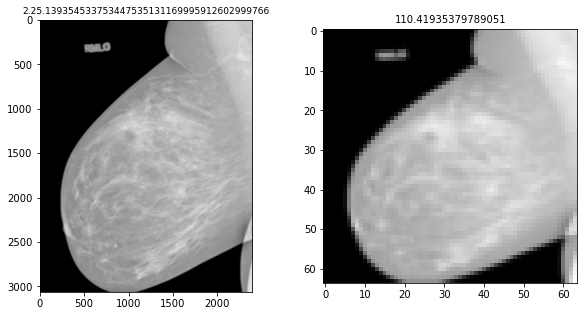

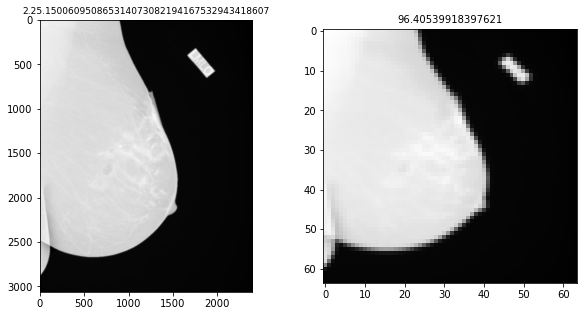

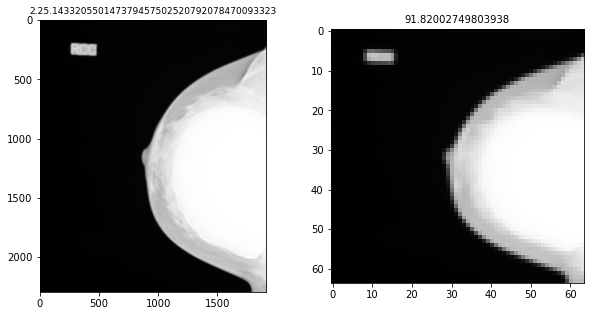

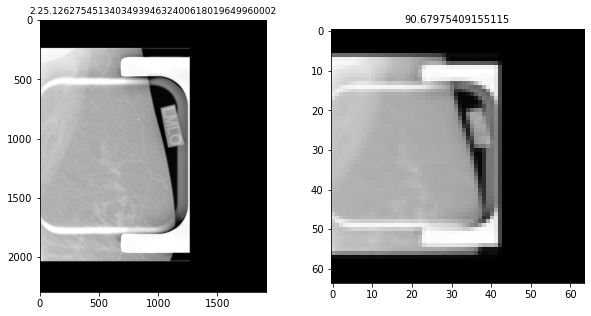

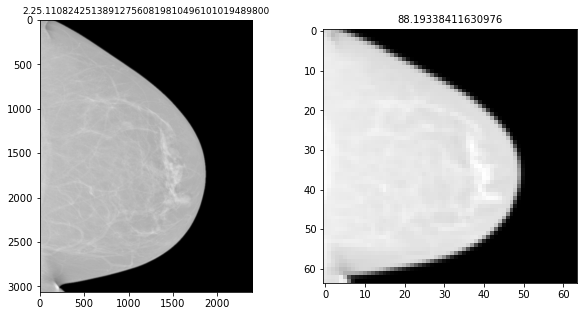

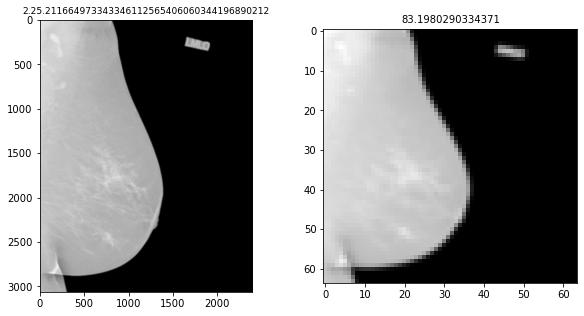

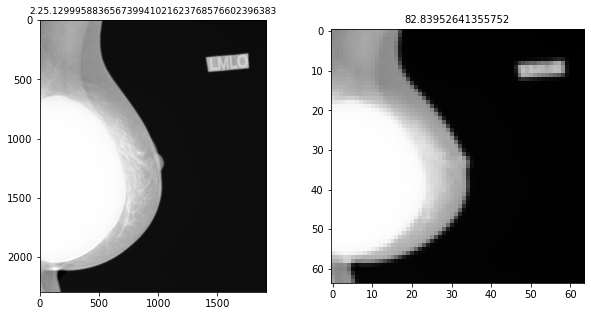

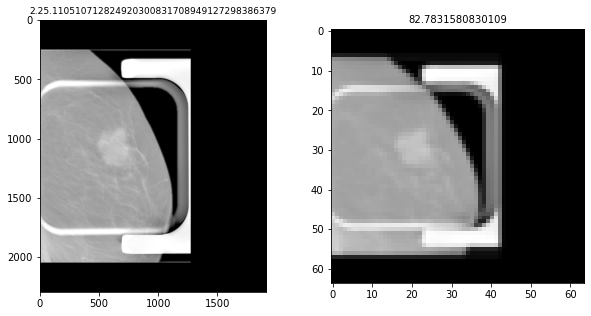

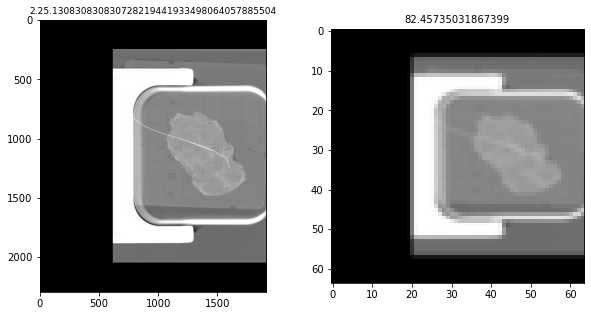

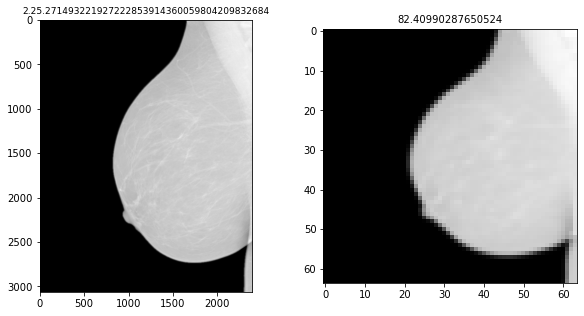

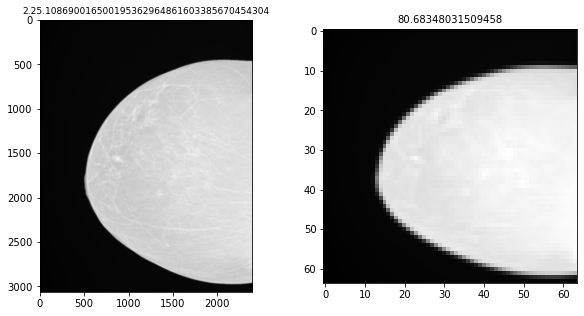

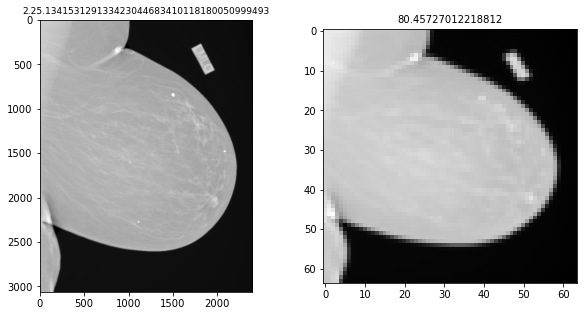

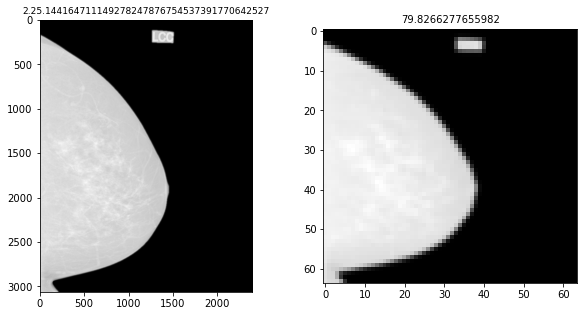

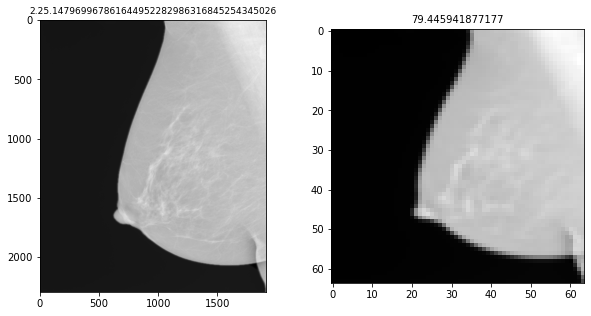

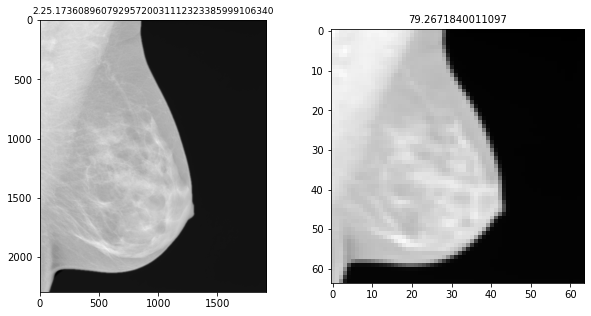

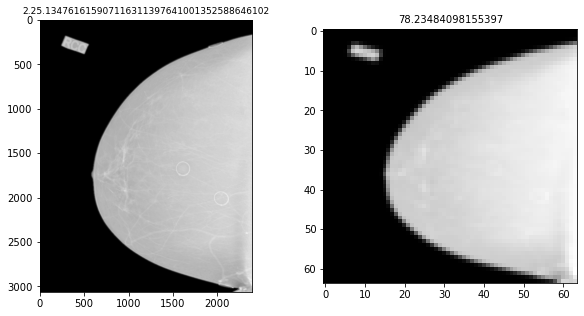

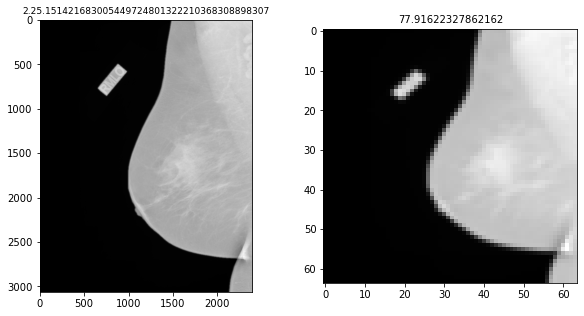

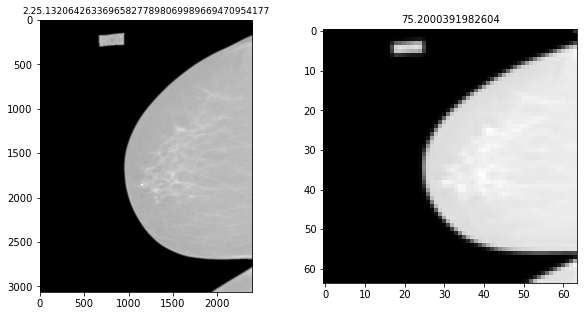

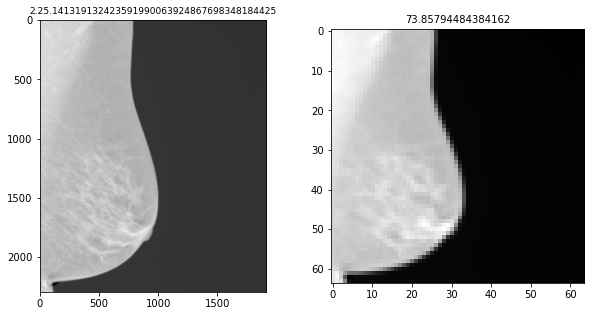

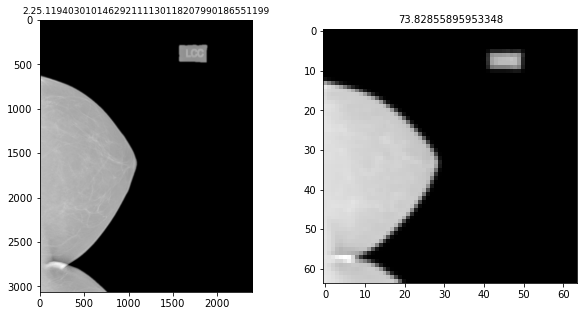

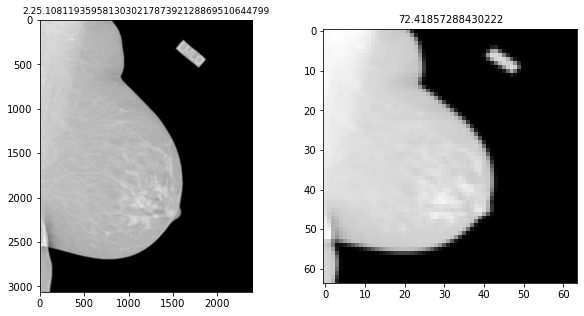

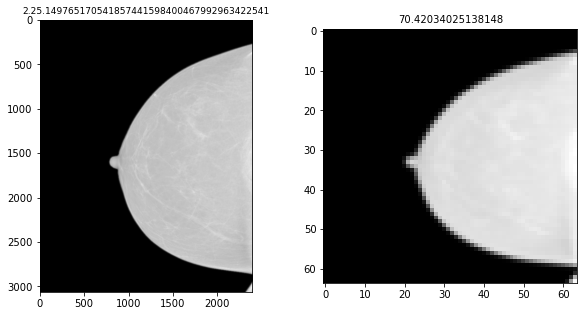

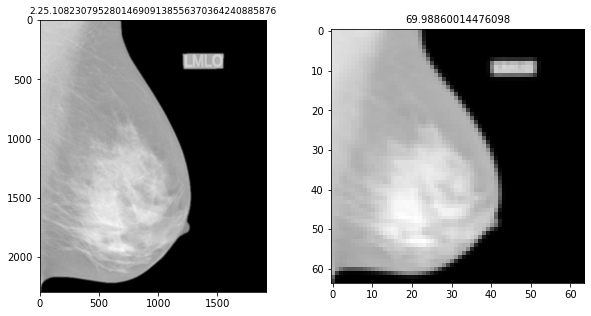

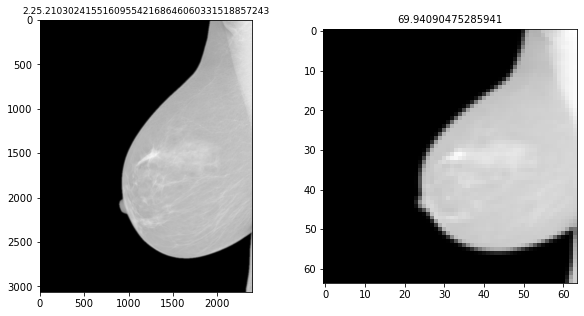

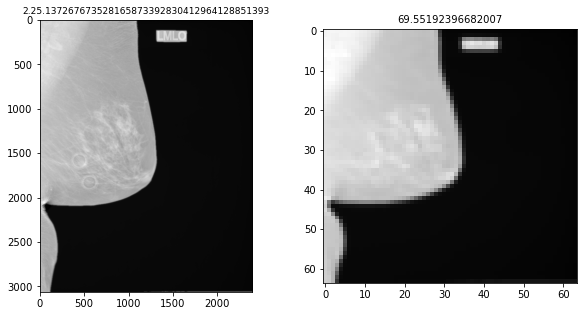

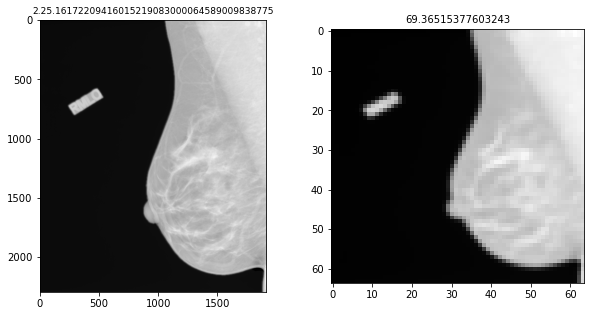

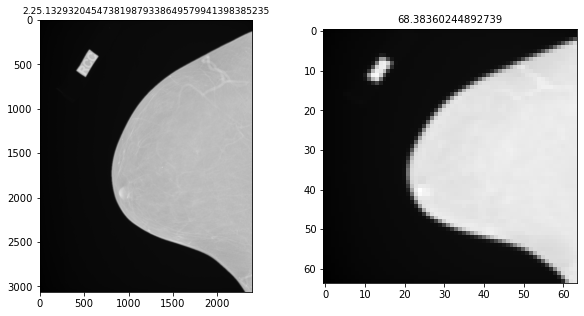

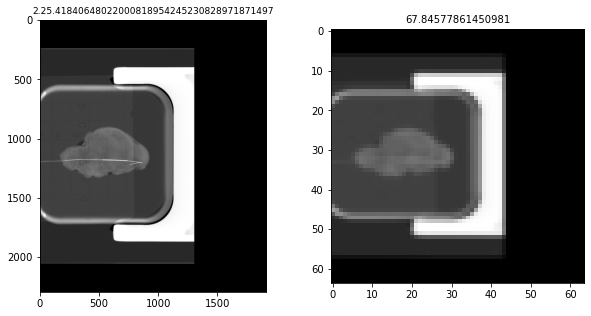

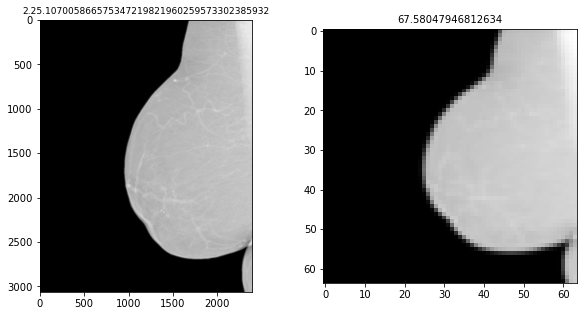

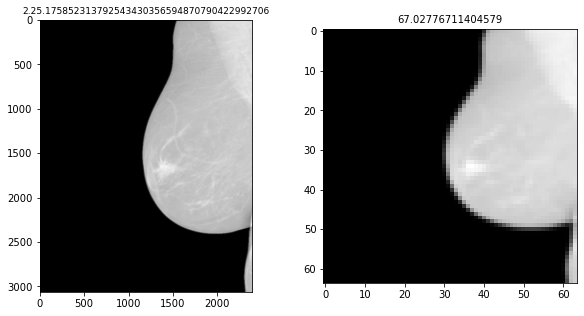

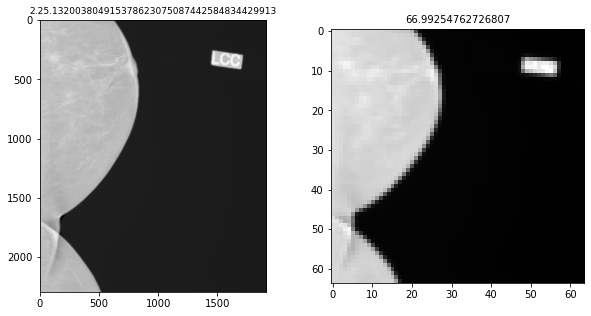

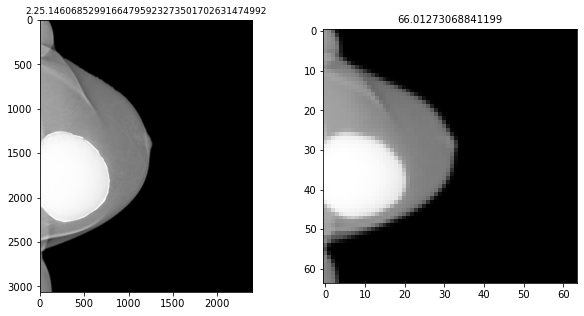

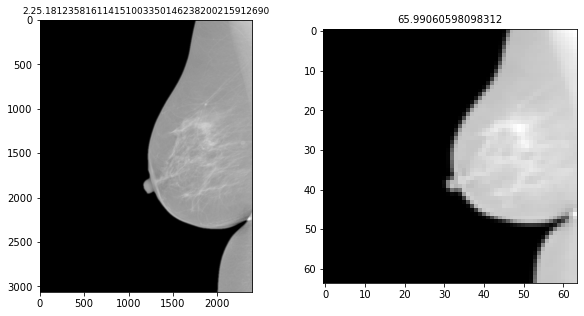

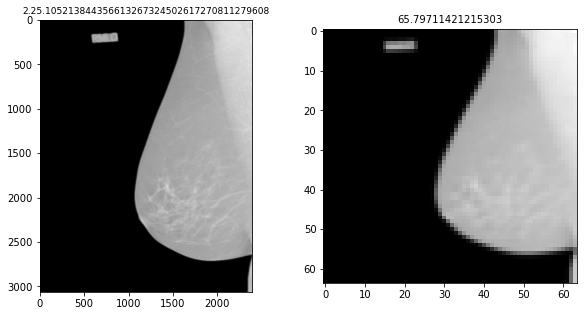

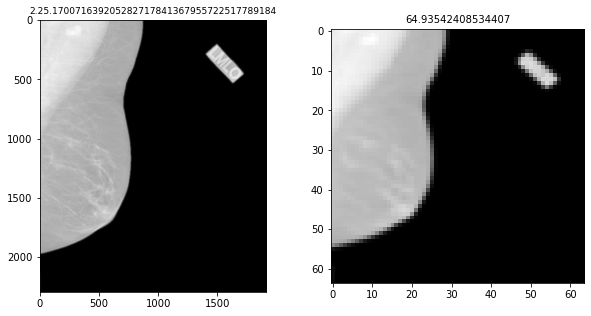

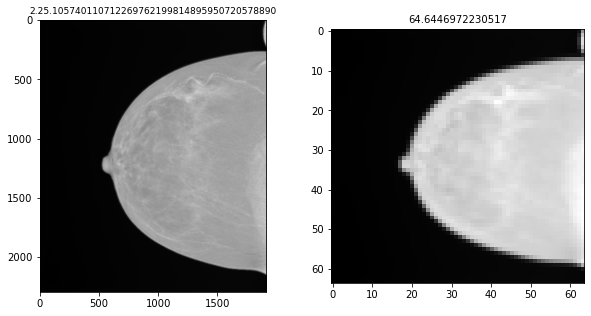

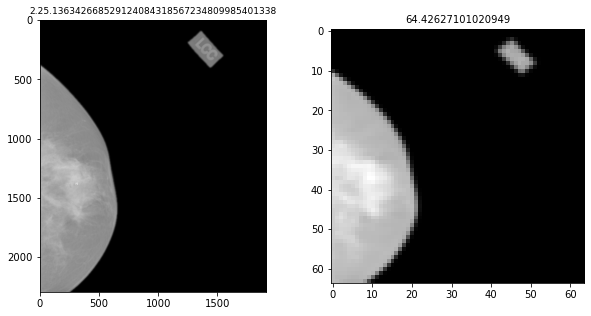

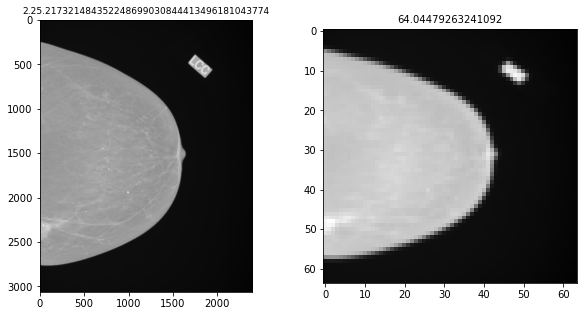

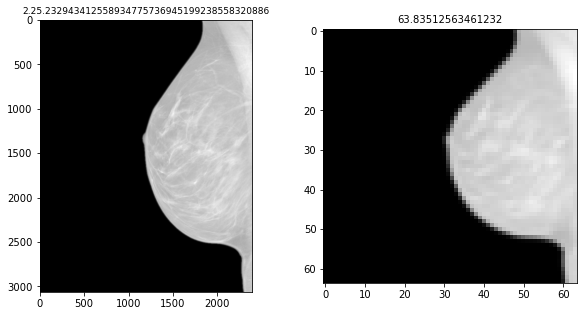

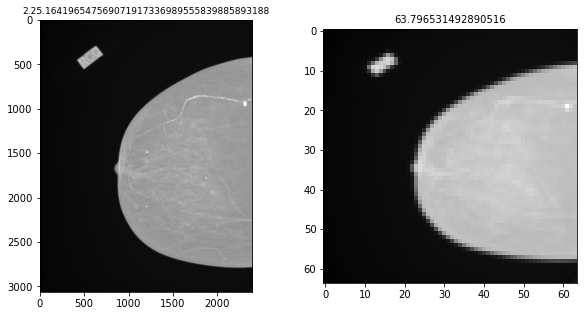

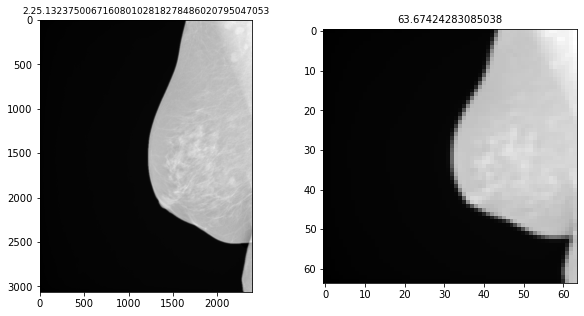

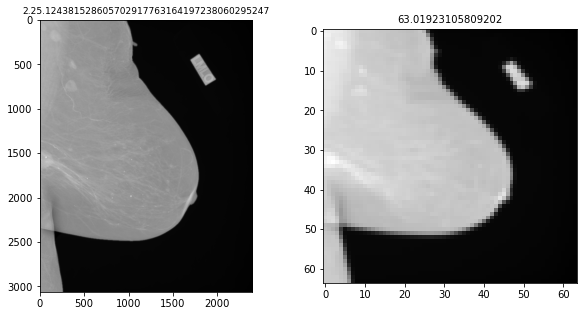

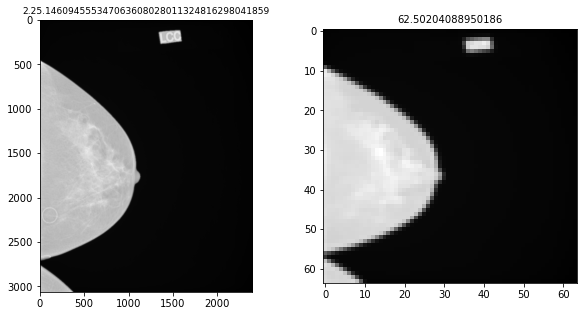

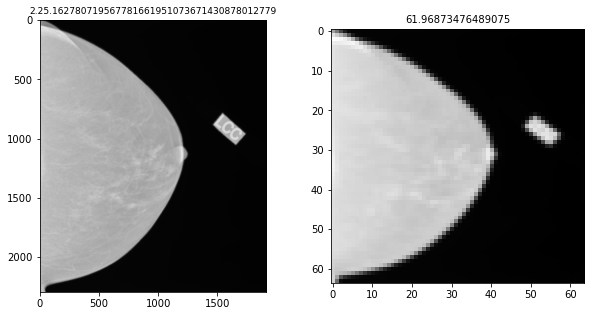

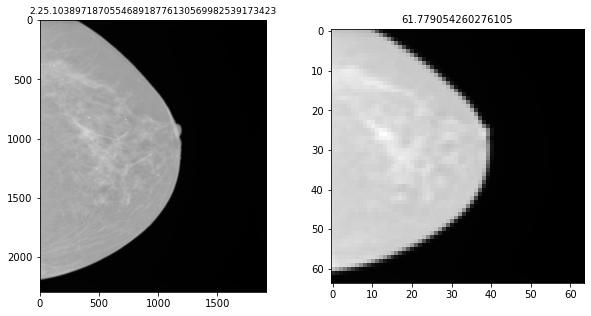

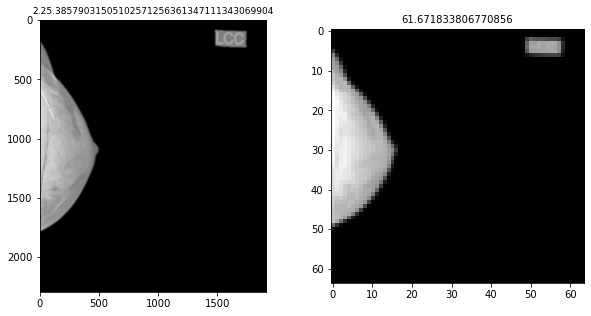

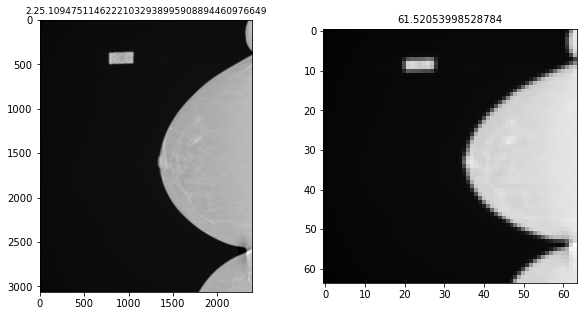

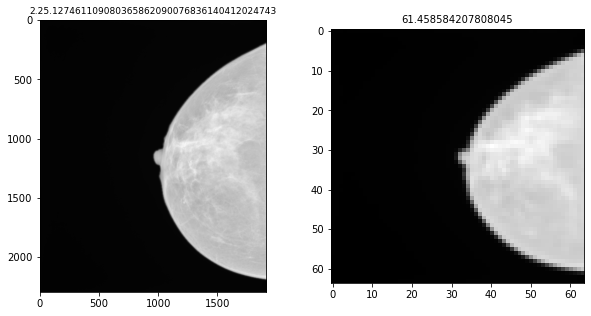

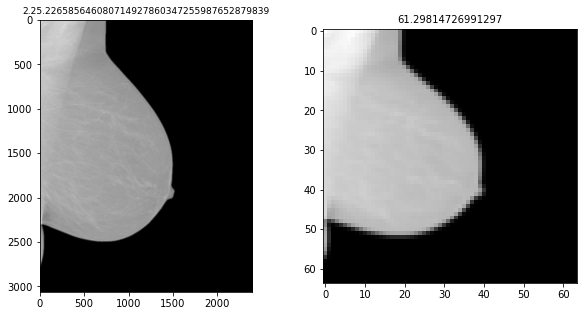

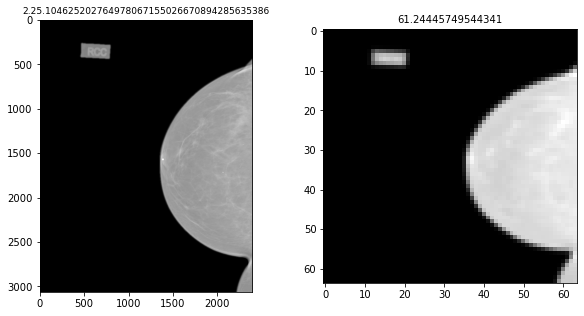

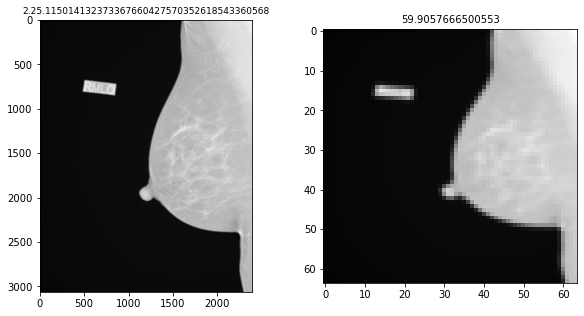

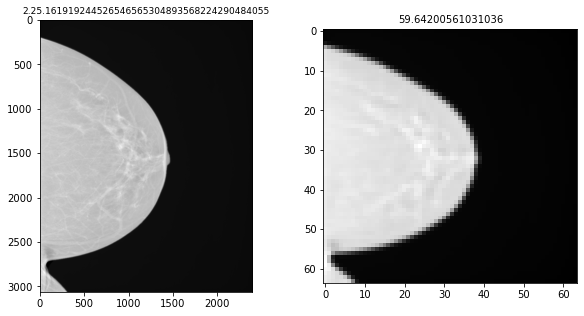

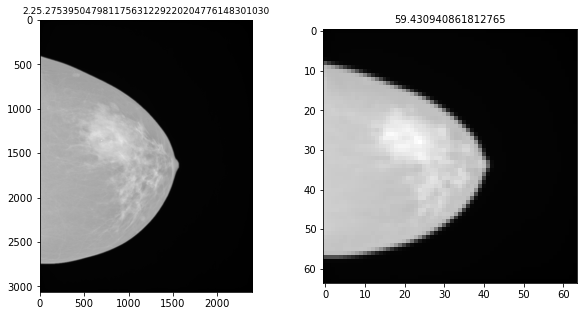

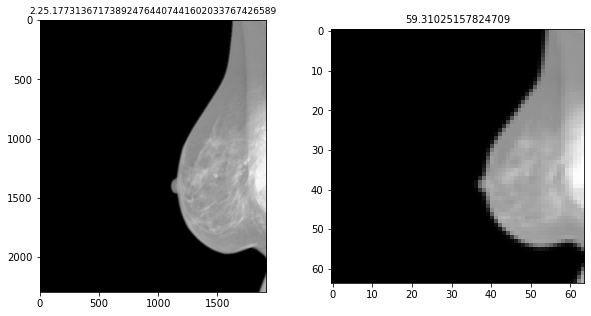

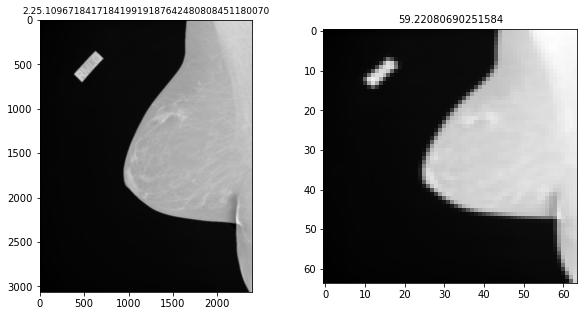

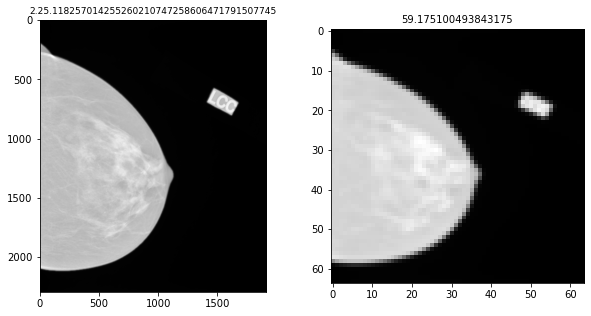

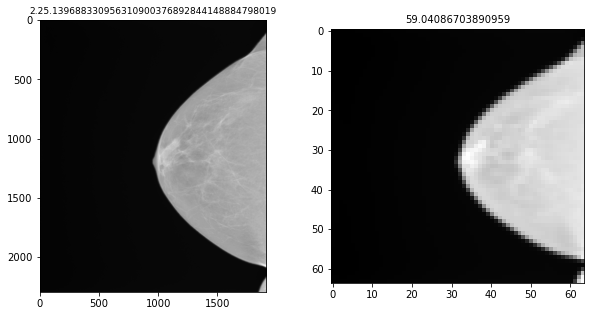

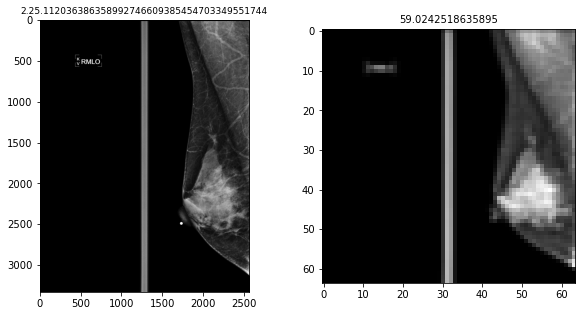

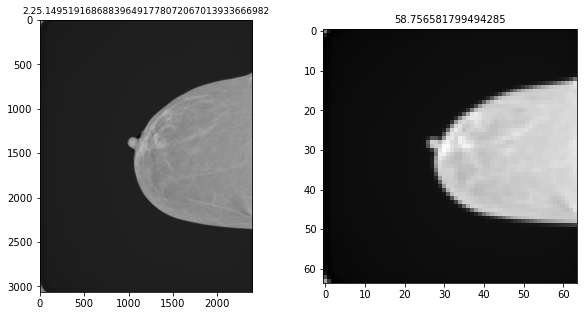

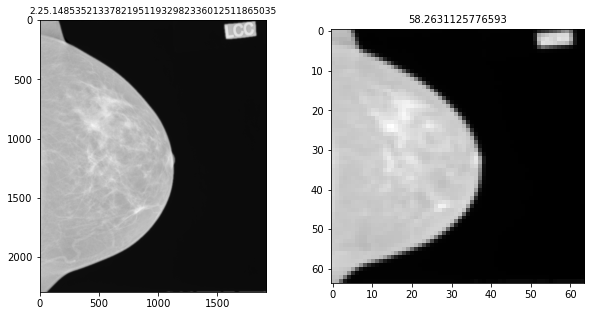

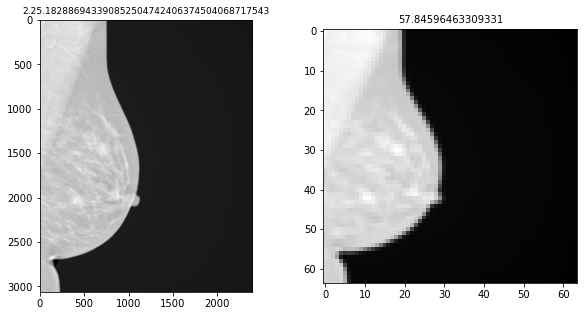

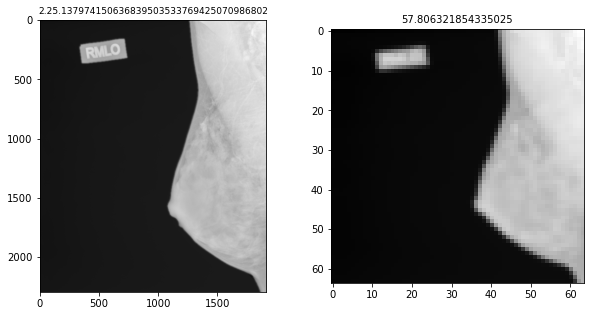

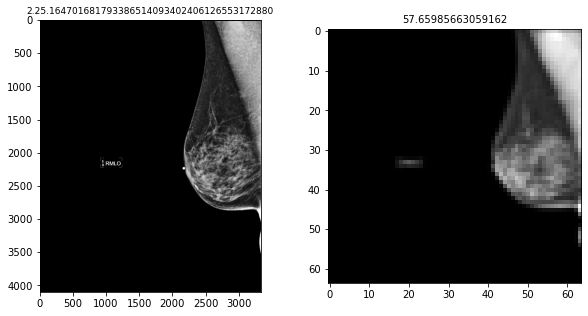

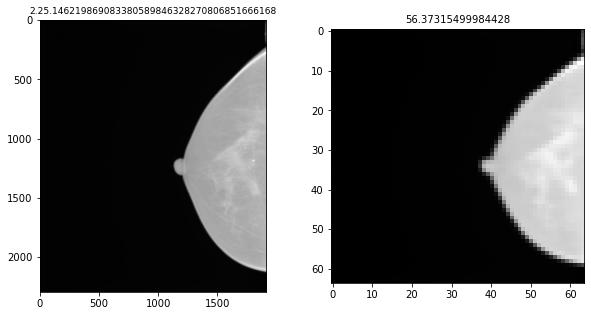

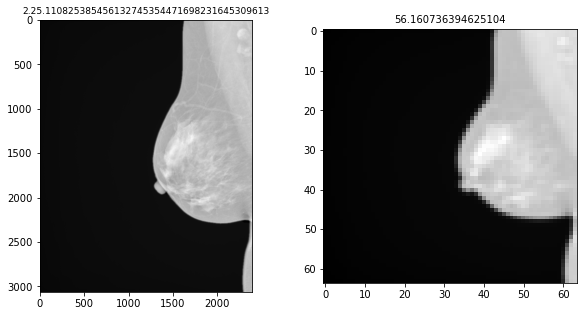

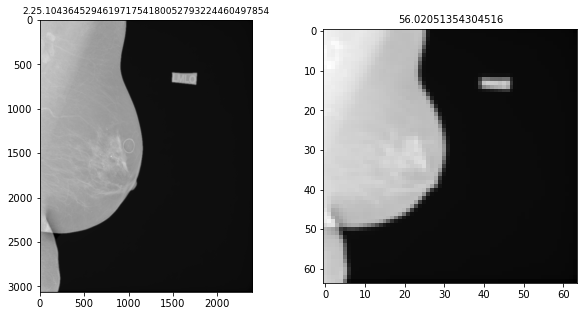

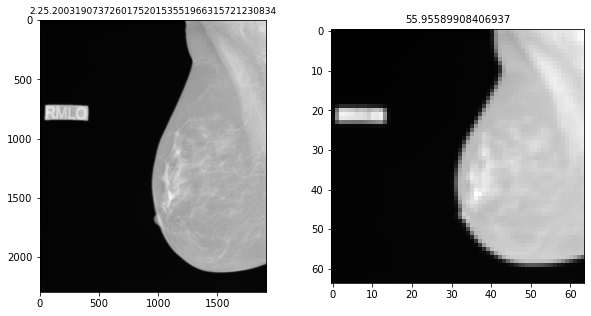

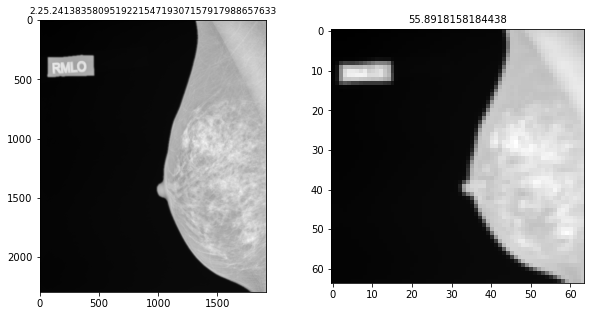

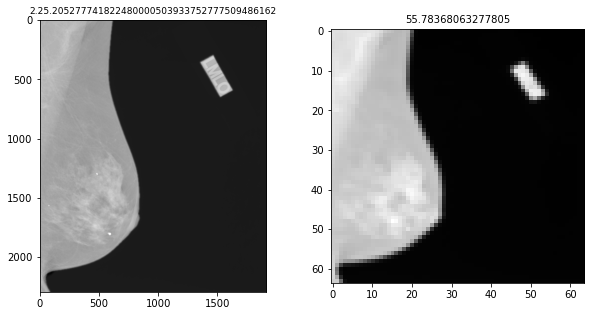

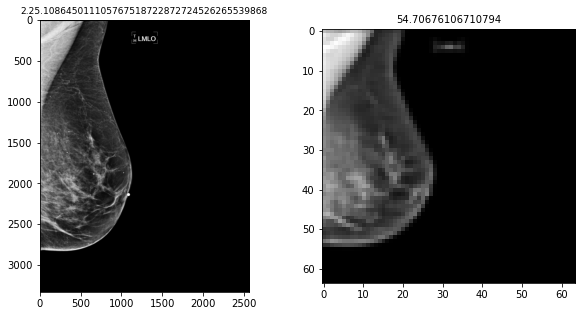

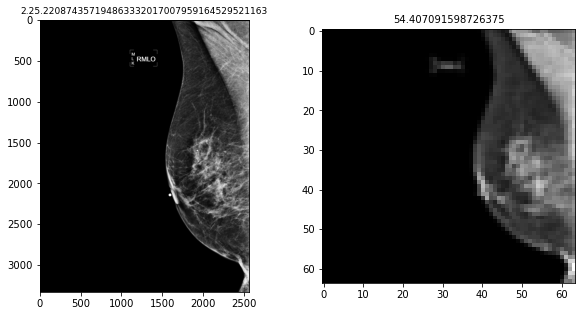

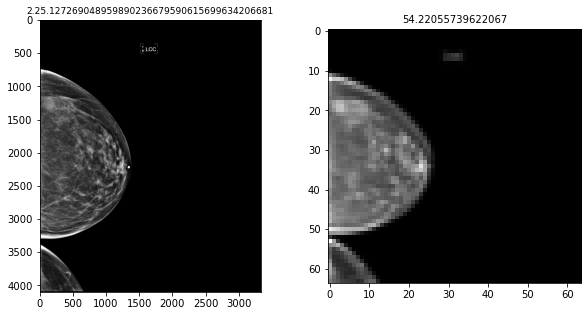

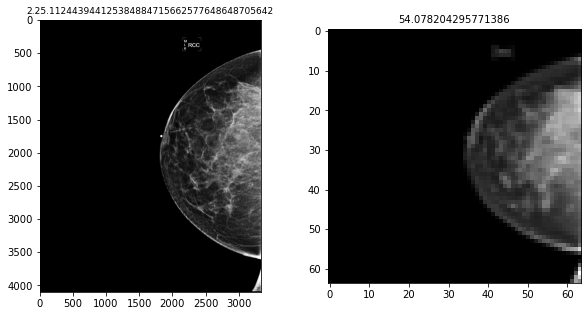

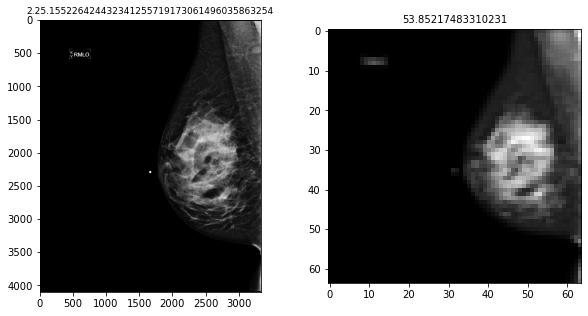

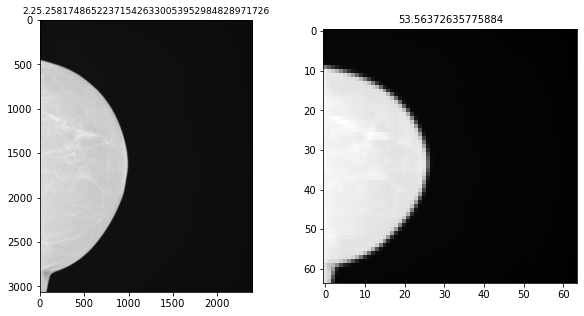

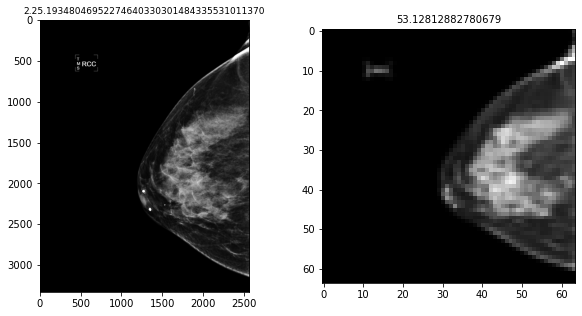

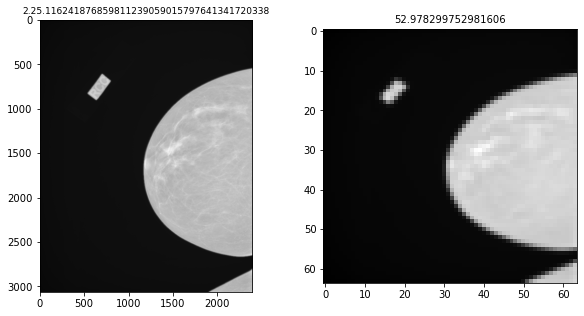

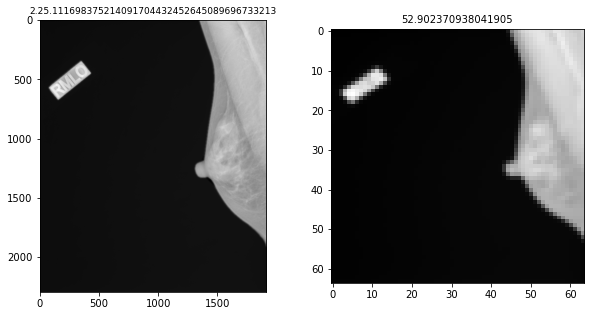

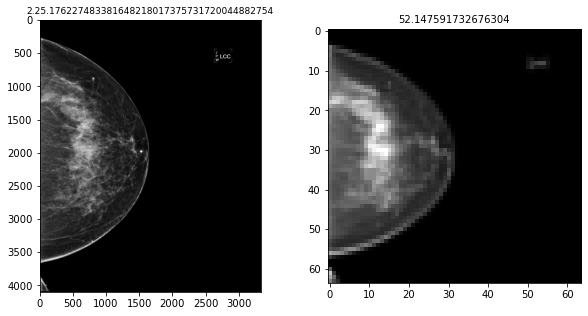

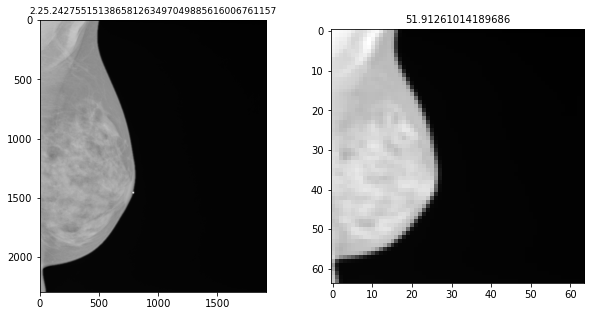

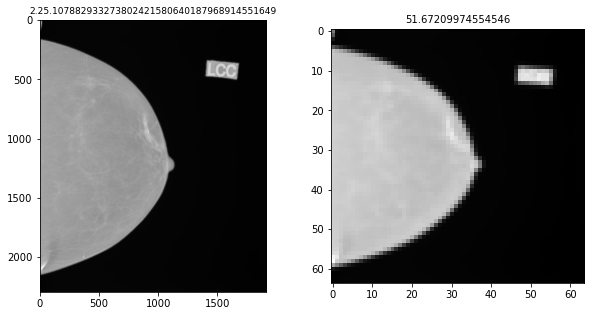

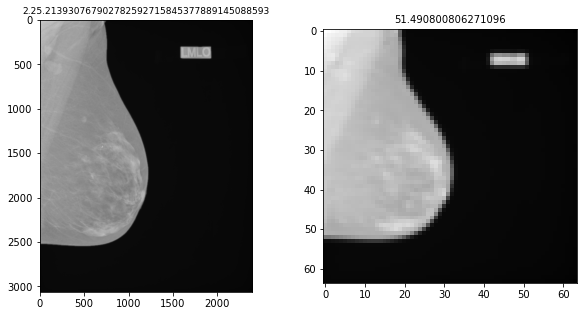

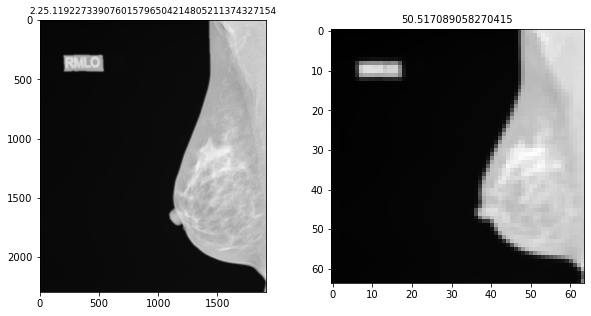

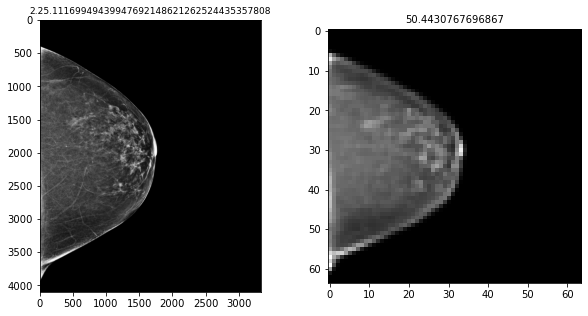

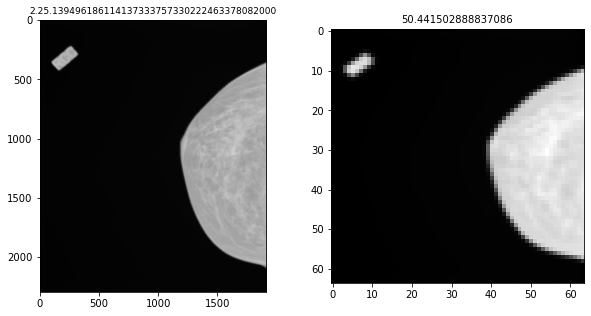

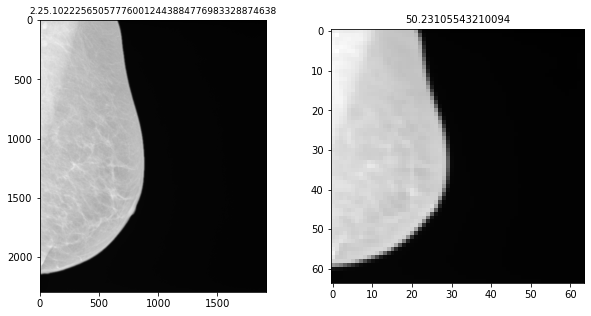

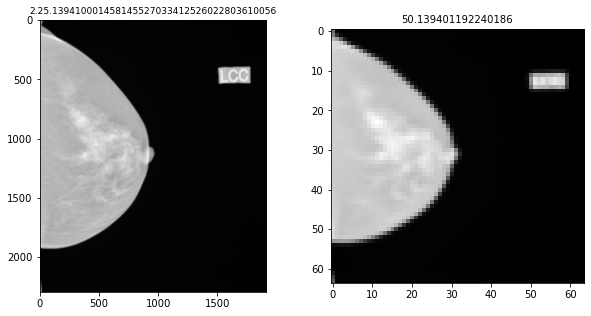

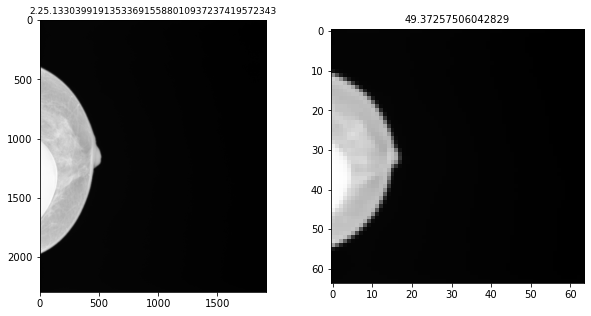

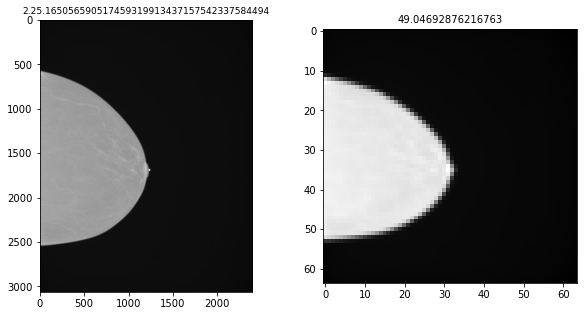

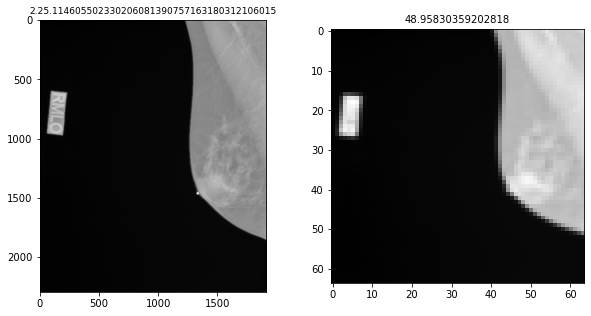

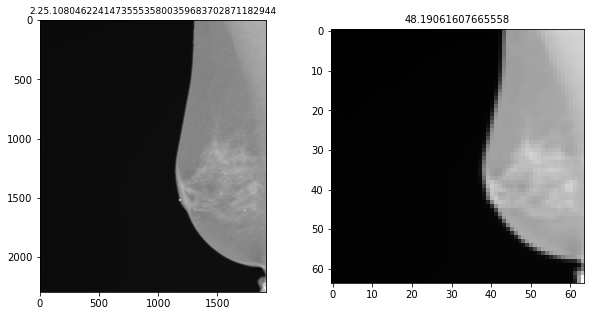

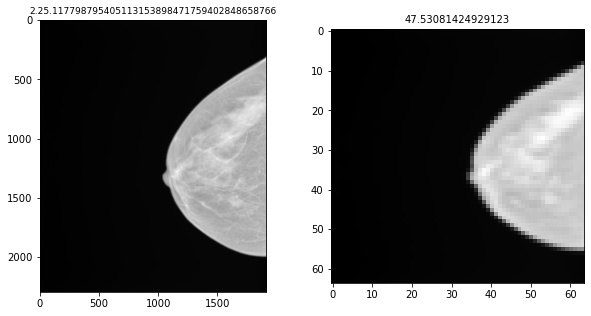

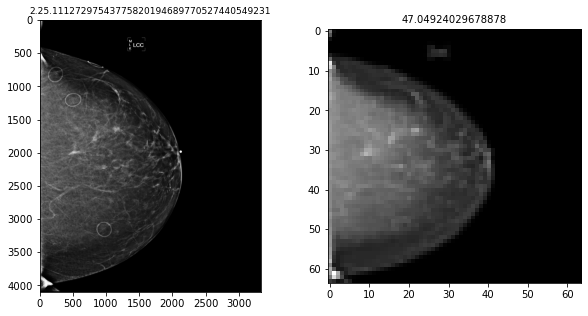

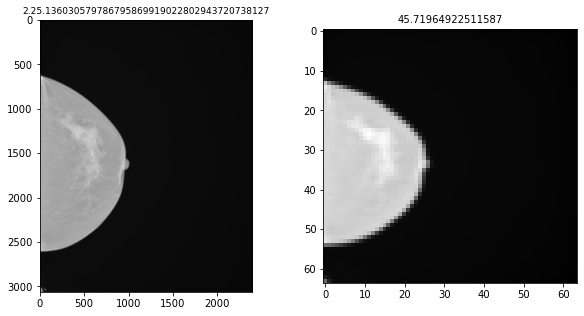

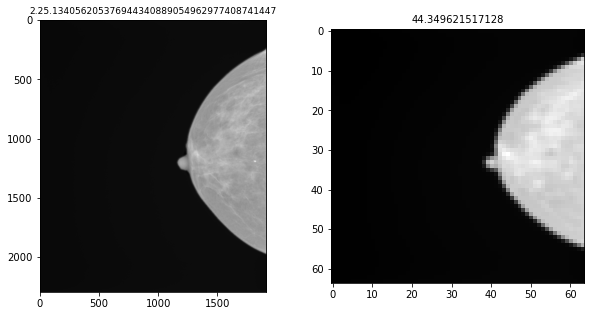

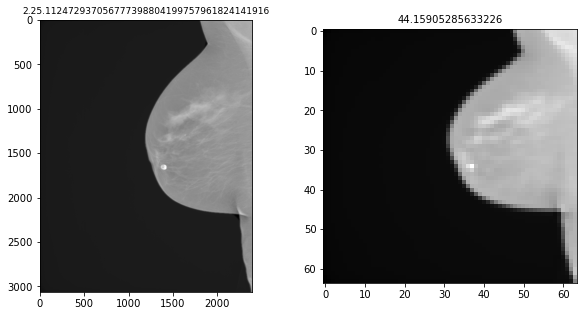

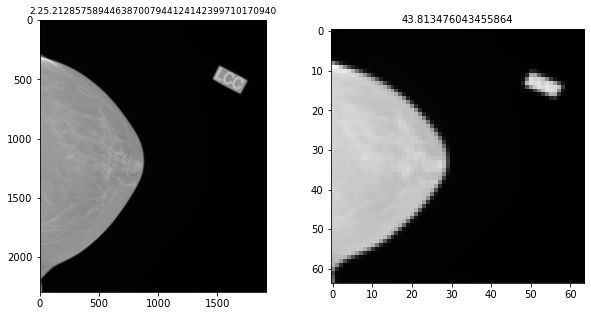

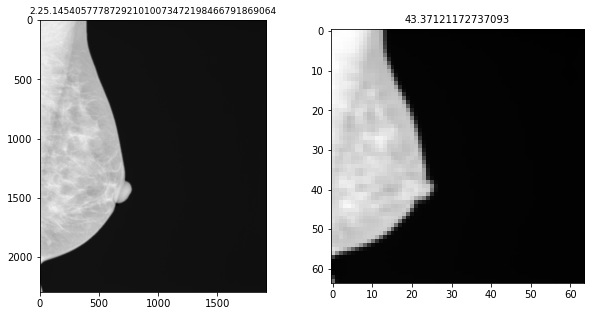

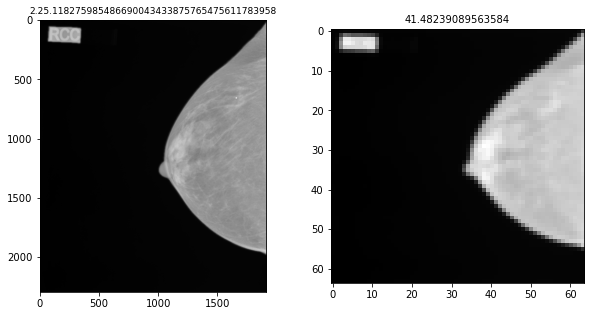

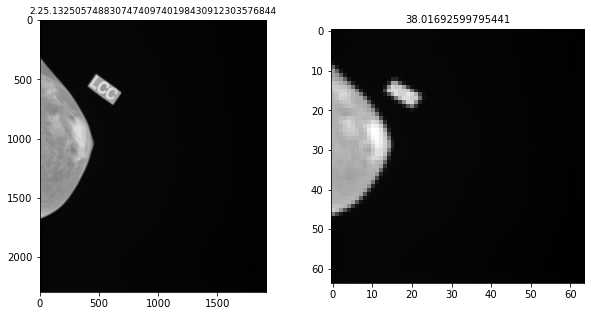

In [5]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='AE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])

In [6]:
path_to_bad_ids = "../../bad_image_sopuids.txt"
accuracy = O.OutlierDetector.accuracy(imgs, [train_scoresX], path_to_bad_ids, 8)
print(accuracy)

0.5
